# Modelagem simples para previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que uma dada empresa investe: TV, Jornal e Rádio


Sobre os dataset
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões de reais

In [2]:
#manipulation
import pandas as pd
import numpy as np

#vizualization
import seaborn as sns
import matplotlib.pylab as plt

# estilo dos gráficos
plt.style.use('fivethirtyeight')

#import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Importar a Base de dados

In [4]:
df = pd.read_csv('data/advertising.csv')

In [5]:
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.shape

(200, 4)

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

## Analisando a distribuição dos valores de investimento

In [8]:
# Armazenar os valores e as colunos em listas

val_col = []
labels = []
for col in df.columns[:3]:
    val_col.append(round(df[col].sum(),2))
    labels.append(col)

In [9]:
# Paleta de cores
royal_blue = '#4169E1'
light_steel_blue = '#B0C4DE'
slate_gray = '#B0C4DE'
light_slate_gray = '#778899'
medium_green = '#00FA9A'

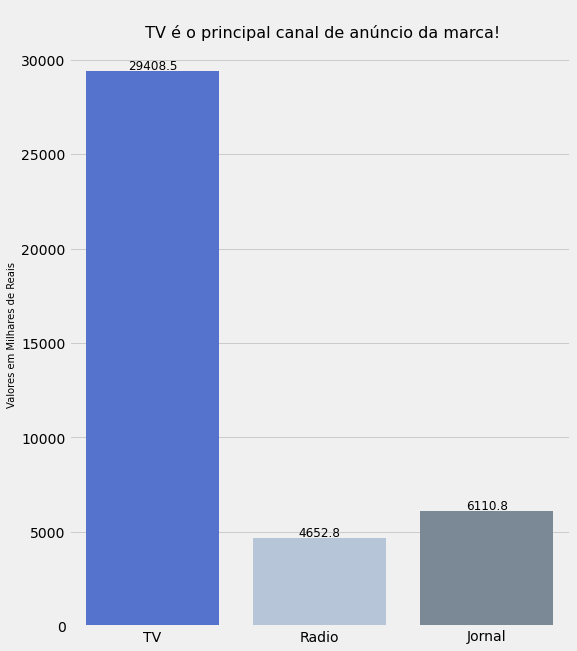

In [10]:
from scipy.linalg.matfuncs import fractional_matrix_power
# Tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(8,10))

# figura
sns.barplot(x = labels,y=val_col,
           palette=[royal_blue,slate_gray,light_slate_gray])

# anotação
for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha = 'center', color = 'black', size = 12)

#texto e titulo
plt.title('\n TV é o principal canal de anúncio da marca!', fontdict={'size':16})
plt.ylabel('Valores em Milhares de Reais',fontsize=10)
plt.show()

Text(-1.3, -1.2, 'Distribuição de investimetos(%)')

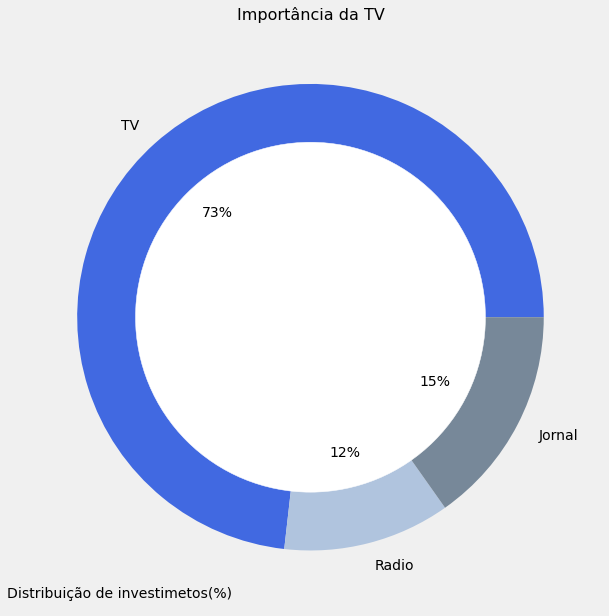

In [11]:
# Dimensionamento da figura
plt.figure(figsize=(10,10)) 

# definição do tipo de grafico
plt.pie(val_col,labels=labels,autopct='%.0f%%',colors=[royal_blue,light_steel_blue,light_slate_gray])

# circulo central branco
my_circle=plt.Circle( (0,0), 0.75, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

#titulo e texto
plt.title('Importância da TV', fontdict={'size':16})
plt.text(-1.3,-1.2,'Distribuição de investimetos(%)')

Uma vez que os valores investidos em `TV` representam mais de <b>70%</b> do total, veremos se há alguma influência nas `VENDAS`

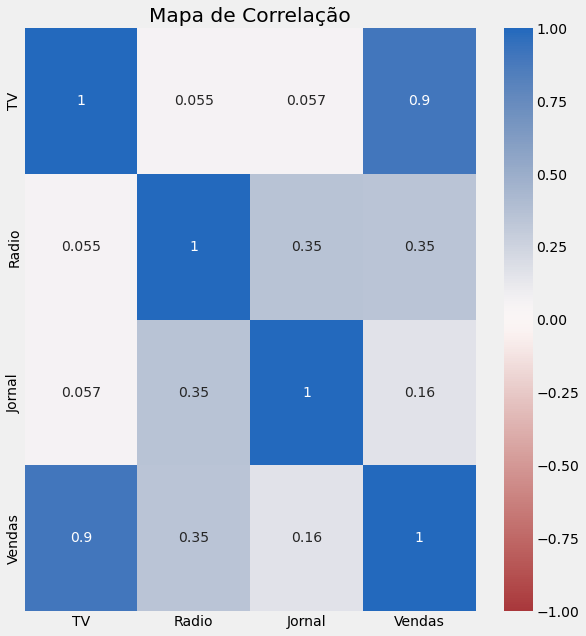

In [12]:
# plot
fig,ax = plt.subplots(figsize = (9,10))

# mapa de correlação
cmap = sns.color_palette("vlag_r", as_cmap=True)

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap = cmap)

plt.title('Mapa de Correlação')
plt.show()

Com base no gráfico acima, nota-se uma forte associação positiva entre `Vendas ` e `TV`. 

> Neste momento não podemos afirmar que os investimentos em propaganda na `TV` sejam a <b>CAUSA</b> do volume de `Vendas`, no entanto temos apenas um forte indício  que isto seja verdade.

<AxesSubplot:>

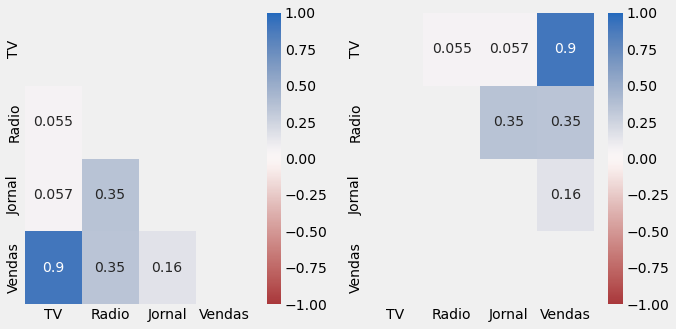

In [13]:
# plot
fig,ax = plt.subplots(1,2,figsize=(10,5))

# mascara
maskup = np.triu(df.corr())
maskdo = np.tril(df.corr())

#up
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap=cmap,
            mask=maskup,ax=ax[0])

#down
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap=cmap,
           mask=maskdo,ax=ax[1])

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [14]:
# Definindo o Target
y = df['Vendas']

# Definindo as Features
X = df.drop(['Vendas'],axis=1)

# data split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1,)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest ( Múltiplas arvores de decisão)

In [15]:
# Objetos
model_linear = LinearRegression()
model_rforest = RandomForestRegressor(n_estimators=300)

# Treino
model_linear.fit(x_train,y_train)
model_rforest.fit(x_train,y_train)

print('Modelos treinados!')

Modelos treinados!


#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [16]:
# Metrica
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error

# predict
pred_linear = model_linear.predict(x_test)
pred_rforest = model_rforest.predict(x_test)

# comparation
#help(r2_score)
print(f'Linear Regression Score: {r2_score(y_test,pred_linear)}')
print(f'Random Forest Score: {r2_score(y_test,pred_rforest)}')




Linear Regression Score: 0.9071151423684273
Random Forest Score: 0.9640458436709531


A partir dos Scores apresentados, podemos constatar o melhor desempenho do Random Forest.

#### Visualização Gráfica das Previsões

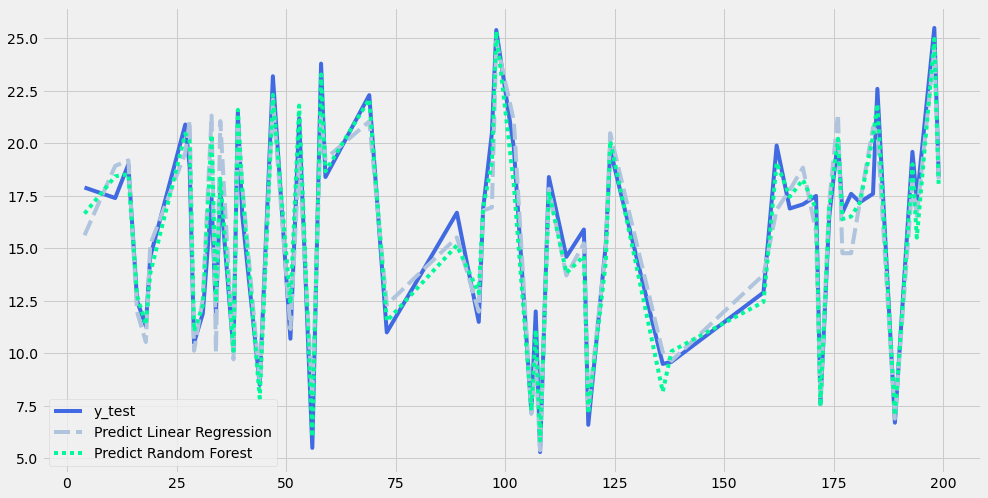

In [17]:
# dataframe for visualization

df_view = pd.DataFrame()
df_view['y_test'] = y_test
df_view['Predict Linear Regression'] = pred_linear
df_view['Predict Random Forest'] = pred_rforest

plt.figure(figsize=(15,8))
sns.lineplot(data = df_view,
             palette=[royal_blue,slate_gray,medium_green])
plt.show()

Para reforçar o Scores.
Podemos observar que o gráfico de previsão do Random Forest (em verde) é o que mais se adequa aos dados de Teste (em azul). Ou seja, os valores preditos por este algorítimo são os que mais apróximos da realidade destes dados.

#### Nova previsão

Por fim, faremos uma previsão com novos dados

In [19]:
# Novos Dados
df_new = pd.read_csv('data/novos.csv')
df_new

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [20]:
# Predição
pred_rforest2 = model_rforest.predict(df_new)

In [21]:
df_new['Previsao_Vendas'] = pred_rforest2
df_new

,TV,Radio,Jornal,Previsao_Vendas
0,23.1,3.8,69.2,7.638333
1,44.5,0.0,5.1,8.672000
2,170.2,45.9,0.0,19.917000


# FIM